In [1]:
import json

In [2]:
contexts =  json.loads(open('outputs/gpt-3.5-turbo-16k-0613_$proofwriter-neurosymbolic-2shot_context.json', 'r').read())

generation_prc =  json.loads(open('outputs/gpt-3.5-turbo-16k-0613_$proofwriter-neurosymbolic-2shot_generations_prc.json', 'r').read())

generation_raw =  json.loads(open('outputs/gpt-3.5-turbo-16k-0613_$proofwriter-neurosymbolic-2shot_generations_raw.json', 'r').read())

references =  json.loads(open('outputs/gpt-3.5-turbo-16k-0613_$proofwriter-neurosymbolic-2shot_references.json', 'r').read())

In [6]:
references

['Uncertain',
 'False',
 'Uncertain',
 'True',
 'False',
 'False',
 'True',
 'Uncertain',
 'True',
 'Uncertain',
 'False',
 'True',
 'True',
 'True',
 'Uncertain',
 'Uncertain',
 'True',
 'Uncertain',
 'True',
 'Uncertain']

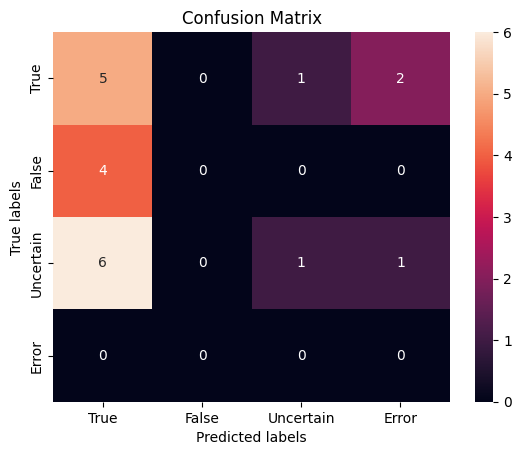

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels=["True", "False", "Uncertain", "Error"]

cm = confusion_matrix(
    labels=labels,
    y_true=references,
    y_pred=[x[0] for x in generation_prc]
)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [12]:
import pandas as pd

df = pd.DataFrame({
    "contexts": contexts,
    "generation_prc": [x[0] for x in generation_prc],
    "generation_raw": generation_raw,
    "references": references
})

df

,contexts,generation_prc,generation_raw,references
0,[Premise: The bear is an animal.\nFOL: Animal(...,True,[TEXT:\tThe bear eats the dog.\nFOL:\tEats(Bea...,Uncertain
1,[Premise: All quiet people are nice.\nFOL: all...,True,[TEXT: Erin is nice.\nFOL: Nice(Erin)\n\nTEXT:...,False
2,[Premise: Charlie is nice.\nFOL: Nice(Charlie)...,True,[TEXT:\tCharlie is cold.\nFOL:\tCold(Charlie)\...,Uncertain
3,[Premise: Charlie is blue.\nFOL: Blue(Charlie)...,True,[TEXT:\tCharlie is cold.\nFOL:\tCold(Charlie)\...,True
4,[Premise: Dave is a living being.\nFOL: Living...,True,[TEXT:\tDave is furry.\nFOL:\tFurry(Dave)\nTEX...,False
5,[Premise: The bald eagle is an animal.\nFOL: A...,True,[TEXT:\tThe bald eagle does not need the mouse...,False
6,[Premise: Anne is a person.\nFOL: Person(Anne)...,True,[TEXT:\tAnne is nice.\nFOL:\tNice(Anne)\nTEXT:...,True
7,[Premise: The dog is an animal.\nFOL: Animal(d...,True,[TEXT:\tThe dog eats the tiger.\nFOL:\tEats(do...,Uncertain
8,[Premise: Bob is big.\nFOL: Big(Bob)\n\nPremis...,True,[TEXT:\tBob is furry.\nFOL:\tFurry(Bob)\nTEXT:...,True
9,[Premise: The bear is an animal.\nFOL: Animal(...,Error,[TEXT:\tThe bear does not chase the cat.\nFOL:...,Uncertain
